# 4. Training Models Notes

## Linear Regression

Linear Regression is statistical method used to examine the relationship between two or more continous variables - one independent variable (e.g squre footage) and one dependent variable (price). The goal of linear regression is to find the best fitting lione throguh a set of data points which can then be used to make predictions about future observations.

Mathimatically, a linear model makes a prediction by simply computing a weighted sum of it's input features, plus a constant called the bias term. In a vectorized format, the equation can be expressed as:

`y = h0(X) = 0 * X`


### How do we train it?

The most common method train a regression model is Root Mean Squared Error of the predictions, meaning we need to find the values of parameter vector such that they minimize the RMSE.

There are two ways to accomplish this

    1. *The Normal Equation (closed form solution)*
    2. *Gradient Descent*
    
### The Normal Equation

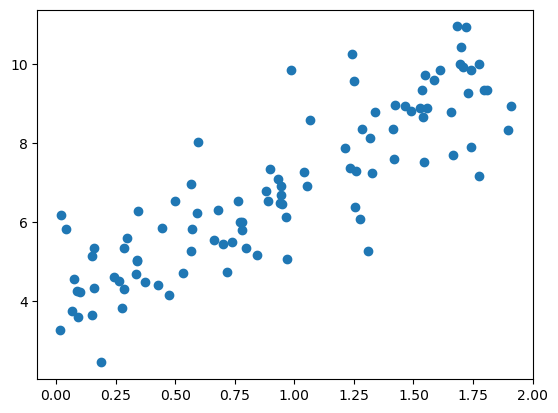

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100,1)
y = 4 + (3 * X) + np.random.randn(100,1)

plt.scatter(X,y)

In [13]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.05620691],
       [2.92819386]])

The ideal parameters would have been 4 & 3 since that was the parameters in our original equation, but the Gaussian noise (e.g `np.random.randn(100,1)`  made it impossible to get an exact match.

But now we can make predictions:

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05620691],
       [9.91259462]])

(0.0, 2.0, 0.0, 15.0)

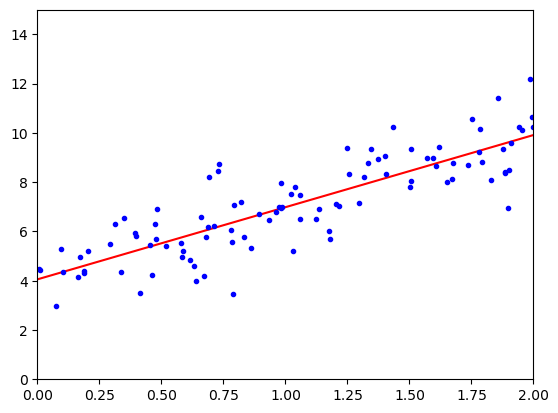

In [19]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

### Implementing the Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(X_new)

[4.05620691] [[2.92819386]]


array([[4.05620691],
       [9.91259462]])

### Gradient Descent

For cases where there is a large number of features or too many training instances to fit in memory, Gradient Descent is the more performant approach to find theta.

The idea of GD is to tweak parameters iteratively in order to minimze the cost function (e.g MSE) the maximum minimum. GD starts with two inputs:

    1. Random Initilization Value - picking random parameter values to start the descent.
    2. Learning Rate: How big of a step should the algorith take with each iteration.
    
If you're learning rate is too small, then the algorithm will have to go many iterations to converge, which will take a look time. However, if the learning rate is too big, the algorithm might diverge by complelty overshooting the desired minimum MSE. 

### Batch Gradient Descent

To implement GD, you need to compujte the gradient of the cost function with regard to each model parameter `theta`. In other words, you need to calculate how much the cost function will change if you change `theta` just a little bit, which is called a **Partial Derivative**.

It is similar to asking "What is the slope of the mountain under my feet if I face east, west, north, ect.

Batch Gradient Descent takes the average of the gradients of all the training examples and then uses that mean gradient to update the parameters, which is why it's called **Batch** Gradient Descent - it uses the full batch of training data at every step (which is a function of the learning rate).

This makes Batch Gradient Descent very slow on large training sets. However, it scales really well w/ the number of features.

### Stochastic Gradient Descent

On the opposite end of the spectrum, Stochastic GD picks a random instance in the training set and computes the gradients based on that single instance, which makes it much faster then Batch GD and opens it up to the possibility to train on huge data sets since only one instance of the trianing set needs to be stored in memory at each step.

On the other hand, because of it's random nature, this makes the cost function very irregular - instead of gently decreasing the cost function at each step until reaches the local minimum, SGD tends to bounce up and down, decreasing only on average. Over time, it will end up at end up very close to the minimum, but once it gets there it will continue to bounce around and never settle. This can actually help the algo jump out of local minimum's into global maximums compared to BGD (e.g it's good at escaping the local minima but bad find the true global minimum).

One solution to this problem is reduce the learning rate over time at each step so that the algo "slows down" as it approaches the global minimum, which is called the `learning schedule`. If the learning rate is reduced too quickly, you may get stuck at a local minimum, but if it's reduced too slowly, you may jump around the global minimum for a long time.

The following code implements SGD w/ Sci-Kit Learn:

In [28]:
from sklearn.linear_model import SGDRegressor

max_iter = 1000 # Runs for 1000 epochs
tol = 1e-3 # Runs for 1000 iterations or until the loss function drops by 0.001 during one iteraction (e.g epoch)
penalty = None # No Regularizatoin
eta0 = 0.1 # Start with a learning rate of 0.1 using the default learning schedule

sgd_reg = SGDRegressor(max_iter=max_iter, tol=tol, penalty=penalty, eta0=eta0)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.9932085]), array([2.89493115]))

### Mini-batch Gradient Descent

MBGD is the middle option between BGD and SGD - intead of computing the gradients based on the entire training set (e.g BGD) or just a single instance (e.g SGD), `Mini-Batch Gradient Descent` computes the gradients on a small random number sets of instances called mini-batches. The main advantage of mini-batch GD is that you can get a performance boost from hardware optimaization of matrix operations, especially when using GPU's.

The algo's process in terms of finding the optimal parameters for the cost function is less eratic than SGD, but it still might struggle to find the local minimum. 

### Polynomial Regression

What if your mdoel is more complex that a straight line? Suprisingly, you can use a linear model to fit nonlinear data by adding powers of each feature as new features and then training a linear model on that extended set of features. This technique is known as `Polynomial Regression`. 

Let's look at an example:

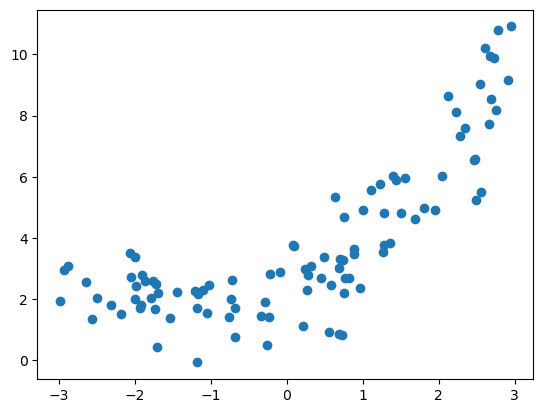

In [94]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X, y)

Clearly, a straightline will never fit this line. So let's use Scikit-Learn's `PolynomialFeatures` class to transform the training data by adding th square of each feature in the training set as a nre feature:

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(f"Preprossed {X[0]}")
print("---")
print(f"Processed {[0]}")

Preprossed [0.93286159]
Processed [0.93286159 0.87023074]


[1.97374623] [[0.93801623 0.49955525]]


(-3.0, 3.0, 0.0, 10.0)

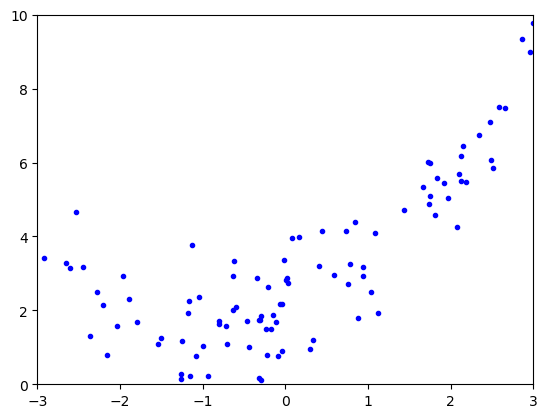

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# plt.plot(X_new, predictions, 'r-')
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])

### Learning Curves

If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it peforms poorly on both, then it is underfitting. That is one way to tell if a model is too complex or too simple.

Another way to tell is to look a the learning curves, which are plots of the models performance on the training set and validation set as a function of the training set size. To generate the plots, train the model several times on different sized subsets of the training set:

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    train_set_size = len(X_train)
    
    for m in range(1, train_set_size):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

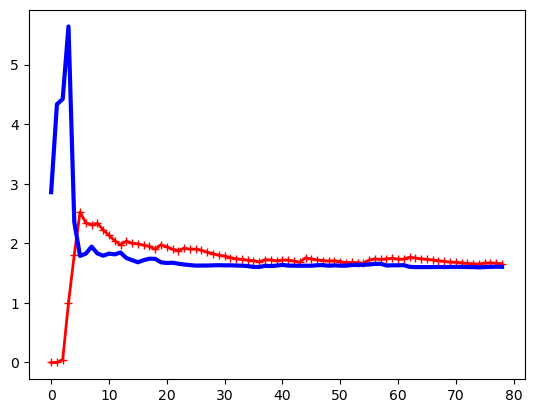

In [95]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)

Looking at the training data, when there are just one or two instances in the training set, the model can fit them perfectly which is why the curve starts at 0. But as new intances are added to the training set, it becomes impossible for the model to fit them the training data perfectly both because the data is noisy and because it is not linear at all. So the error on the data goes up until it reaches a plateau, at which point new instances to the data doesn't really make the average error better or worse.

Looing at the validation data, when there are just one or two instances in the validation set, it is incapable of generalizing properly which is the validation error is initially quite big. Then as the model is shown more examples, it learns and thus the validation error slowly goes down. Hwowever, once again because a straight line cannot do a good job of modeling the data, the error plataue's.

These learning curves are both typical of a model that is underfitting, as both curves have reached a plateau and theya re closly / fairly high.

Now let's look at the tlearning curves of a 10th degree polynomial model on the same data:

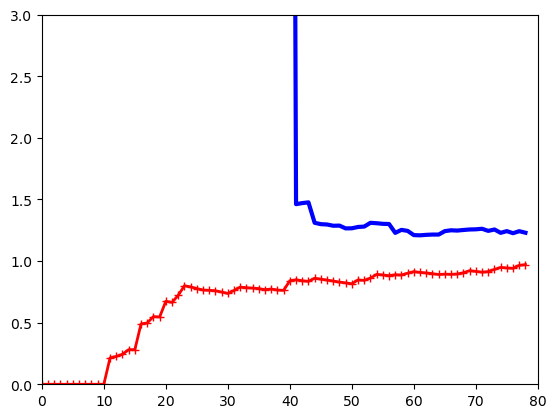

In [98]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

 * The error on the training data is much lower w/ the Linear Regression Model.
 * There is a gap between the curves, which means the model performs signficantly better on the training data than on the valdiation data, which is the hallmark of an overfitting model. If you used a much mlarger training set, the curves would continue to get closer.
 
**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error**.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model by contraining it.

For polynomial models, this can be achieved by reducing the # of polynomial degrees. For a linear model, this can be achieved by constraining the weights of the model.

### Ridge Regression

Ridge Regression is a regularized version of Linear Regression where a regulaization term is added to the cost function, which forces the algo to not overfit the data but also keep the models weights as small as possible. Once the model is trained, you want to use the unregularized performance measure to evaluate the models performance.

If the regularization term is close to 0, then Ridge Regression is just Linear Regression. If the regularization term is very large, then all weights up close to 0 and the result is a flat line going through the data's mean.

For Ridge Regression (and most regularized models), it is important to first scale the features using `StadardScaler` as RR is especially sensitive to the scale of the features.

In [99]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[5.35927185]])

Ridge Regression can also be achieved using the SGD model via the `penalty` parameter.

In [100]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([5.3499045])

### Lasso Regression

Lasso Regression (e.g Least Absolute Shrinkage) works just like Ridge Regression by adding a regularized term to the cost fucntion, but it instead uses the `l1` norm of the weight vector instead of half the square of the `l2` norm.

An important characteristic of Lasso Regression is that it tends to eliminate the  weights of the last important feature by setting them to 0 (e.g it automatically performs feature selection).

There are two main differences when using Lasso versus Ridge Regression:

    1. The gradients in get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down which helps convergence.
    2. The optimal parameters get closer and closer to the origin as you increase the regularization term, but they never get eliminated entirely.
    
 To avoid Gradient Descent bouncing around the optimum at the end when using Lasso, you need to gradually reduce the Learning rate during training.

In [101]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([5.31799029])

### Elastic Net

Elastic Net is the middle ground between Ridge & Lasso Regression - the regularization term is a simple mix of both Ridge and Lasso's RT and you can control the mix ratio `r`. When `r = 0`, Elastic Net is equivalant to Ridge Regression, and when `r = 1`, it is the equivalant to Lasso Regression.

So when should you use Linear Regression vs Lasso vs Ridge vs Elastic net?

It is almost always preferrable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is good by default, but if you suspect only a few features are useful, then you should prefer Lasso or Elastic Net. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the # of features is greater than the number of training instances or when several features are strongly correlated.

In [103]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([5.31468851])

### Early Stopping

A very different way to regularize iterative learning algo's like GD is to stop training as soon as the validation error reaches the minimum and before it starts to go back up, which is a sign of overfitting. This method of regularization is called `early stopping`.

With SGD & Mini-Batch Gradient Descent, the curves are not so smooth so it may hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been abovce the minimum for some time (when you are confident the model will not do any better), and then roll back the model paramters to the point where the validation error was at a minimim.

In [108]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Prepare the Data

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler', StandardScaler())
])

# Transform Data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1, 
    tol=0, 
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005
)

minimum_val_error = float("inf")
best_epoch= None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached be

/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/zacharymessinger/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [112]:
print(f"Minimum Value Error: {minimum_val_error}")
print(f"Best Epoch: {best_epoch}")
print(f"Best model: {best_model}")

Minimum Value Error: 1.1950458062259366
Best Epoch: 191
Best model: SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=0, warm_start=True)


## Logistic Regression

Some regression algo's can be used for classification, and `Logistic Regression` is commonly used to estimate the probability that an instance belongs to a particular class (e.g what is the proability that this email is spam?).

If the estimated probability is greater than 50%, the model predicts that the instasnce belongs to that class and otherwise it predicts that it is not (e.g below 50%). This makes it a binary classifier.

### Estimating Probabilities

`Logistic Regression` works similar to `Linaer Regression` in that the model compujtes a weight sum of the input features plus a bias term, but instead of outputting the result directly it outputs the `logistic` of the result (e.g the sigmoid function).

In [113]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [115]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int) # 1 if Iris is irginica, else 0

In [116]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

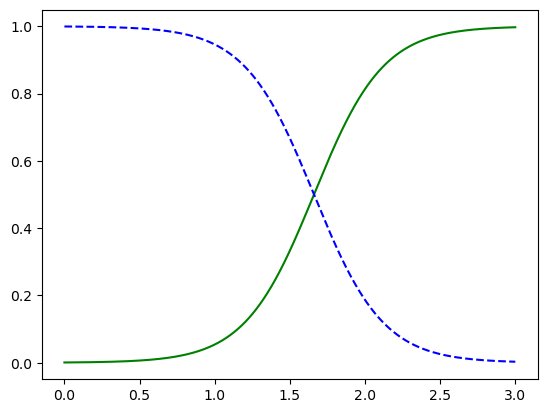

In [126]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")

Just like the other linear models, Logistic Regressions can be regularized using `l1` (Lasso Regression) or `l2` (Ridge Regression) penalities, although Scikit-Learn actually adds an `l2` penalty by default.

### Softmax Regression

The Logistic model can be generalized to support multiple classes directly w/o having to train and combine multiple binary classifiers, which is called `Softmax Regression` or `Multinomial Logistic Regression`.

Softmax Regression works by given an instance `x`:

    1. Computing a score `s(x)` for each class `k`.
    2. Estimating the probablity for each class by applying the `softmax function` to each of the scores.
    3. The class w/ the highest estimated probability wins.

The objective during training is to have a model that predicts a high probability for the target class and low proability for the other classes. Minimizing the cost function, which for Logistic Regression is called cross-entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross Entropy is frequently used to measure hoiw well a set of estimated class proability matches the target classes.

In [ ]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10)

softmax_reg.predict()